## **Práctica 2**

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()

#### Carga de datos

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

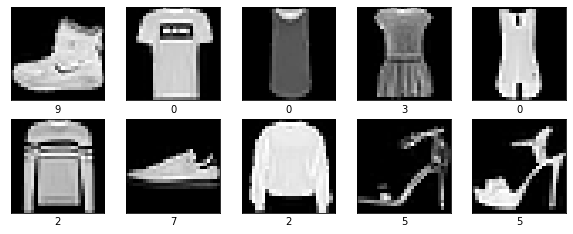

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

### **PCA (Principal Components Analysis)**

#### Calculando el centro de los datos

In [70]:
X = train_images.reshape(60000,784)
mean_X = X.mean(axis=0)
X_std = (X - mean_X)

#### Aplicación de PCA

In [71]:
cov_mattrix = np.cov(X_std, rowvar = 0)
eigen_values, eigen_vectors = np.linalg.eig(cov_mattrix)

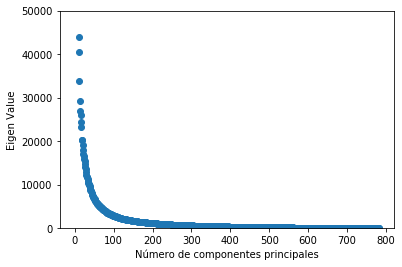

In [72]:
eigen_values_sorted = np.argsort(-eigen_values)
plt.ylabel('Eigen Value')
plt.xlabel('Número de componentes principales')
plt.ylim(0,50000)
plt.scatter(range(eigen_values.shape[0]),eigen_values[eigen_values_sorted])
plt.show()

#### Reducción en dos dimensiones

In [73]:
dim_reduction = eigen_vectors[0:2]
pca = np.dot(X,dim_reduction.T)

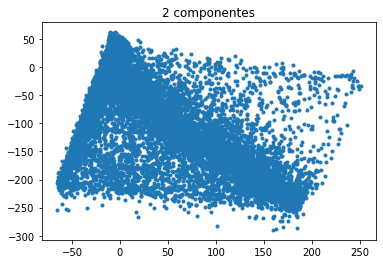

In [74]:
plt.scatter(pca[:, 0], pca[:, 1], marker="."); 
plt.title("2 componentes") 
plt.show()

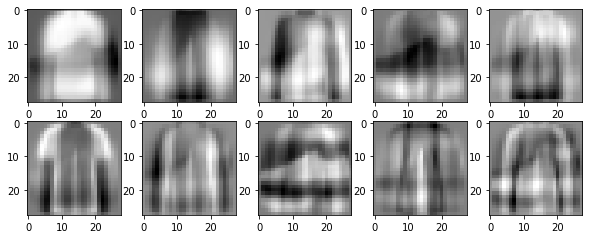

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    reshape = eigen_vectors[:,eigen_values_sorted[i]].reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.imshow(reshape.real, cmap = "gray")

#### Varianza preservada

In [13]:
sum(eigen_values[0:2] / sum(eigen_values))

0.46794537899527777

### **T-SNE**

**Observación**: Se decidió tomar el set de datos de prueba, ya que por la cantidad de imagenes del set de entrenamiento (60,000) que debía procesar no lograba concluir exitosamente el algoritmo T-SNE.

In [25]:
X = test_images.reshape(10000,784)

In [26]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(10000, 2)

In [55]:
Y = LabelEncoder().fit_transform(test_labels)
data_frame_tsne = pd.DataFrame({'X':X_embedded[:,0], 'Y':X_embedded[:,1], 'clase':Y})

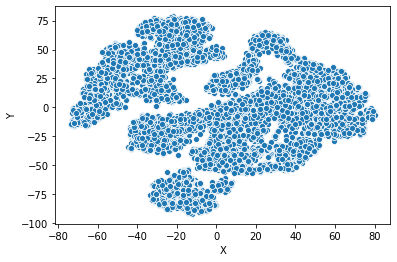

In [60]:
sns.scatterplot(x="X", y="Y", data=data_frame_tsne)

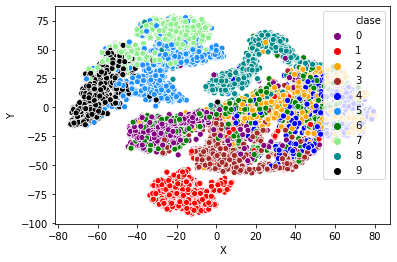

In [63]:
sns.scatterplot(x="X", y="Y",
              hue="clase",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=data_frame_tsne);

#### Conclusión de ambas representaciones

Quizás por la complejidad interna del algoritmo T-SNE este requiere de mayor capacidad de procesamiento para concluir, por esta razón en ambas representaciones se tomaron fuentes de datos distinta, a pesar de esto se puede observar que en PCA la varianza se preserva en menos del 50% lo que indica que a pesar del cambio de dimensionalidad fuerte de 784 a 2 no hubo tanta variación. En relación a T-SNE se observa que a pesar del cambio a dos dimensiones, logra clasificar de forma adecuada cada clase en el set de datos.

### **Clustering - KMeans**

#### Utilizando la representación de T-SNE

In [78]:
kmeans_tsne = KMeans(n_clusters=10)
kmeans_tsne.fit(X_embedded)
y_predict_tsne = kmeans_tsne.predict(X_embedded)

#### Gráfica de los clusters encontrados

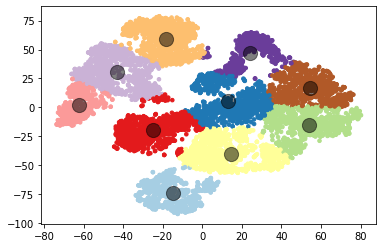

In [82]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],  marker=".", c=y_predict_tsne, s=50, cmap=plt.cm.Paired)

centers_tsne = kmeans_tsne.cluster_centers_
plt.scatter(centers_tsne[:, 0], centers_tsne[:, 1], c='black', s=200, alpha=0.5);

#### Utilizando la representación de PCA

In [81]:
kmeans_pca = KMeans(n_clusters=10)
kmeans_pca.fit(pca)
y_predict_pca = kmeans.predict(pca)

#### Gráfica de los clusters encontrados

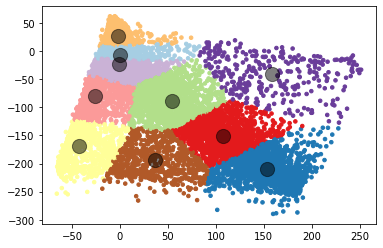

In [83]:
plt.scatter(pca[:, 0], pca[:, 1],  marker=".", c=y_predict_pca, s=50, cmap=plt.cm.Paired)

centers_pca = kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='black', s=200, alpha=0.5);

### **Conclusiones Finales**

Estos comentarios van en relación a las útlimas pruebas realizadas con Kmeans en las representaciones PCA y T-SNE, se ve que T-SNE logra dimensionar de forma mas consistente los cluster y con PCA es ciertamente variable en algunos grupos, esto puede darse por la poca variación que sufre al realizar el redimensionamiento.